## 3.2.5 Linear & Nonlinear Resonances

Here we explore how an external driving force with a frequency $\omega_f$ is applied to the oscillatory system with a natural frequency $\omega_0$.

The motion will be explored for both a linear system and a nonlinear system. To do this, a damping model will be used (i.e. the viscous friction model) to introduce the nonlinearity of the oscillation.

In [1]:
# Import the rk4 method from a different file
from RungeKutta.rk4Algo import dsbRK4
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
def model(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = F*np.cos(wf*t)/m - (b*y[1])/m - (w0*w0)*y[0] #Added the driving for to the nonlinear equation model

    return v

The code above will be used to explore the behavior of the linear and nonlinear oscillators. 

The code below is used to recreate Figure 3.4 in the textbook to understand the notion of the beat frequency of the oscillation and the dying off of transients with sufficiently large driving forces.

Beat frequencies occur when the driving frequency is very close to the natural frequency. The equation is this case becomes

\begin{equation}
    x(t) \simeq 2x_0\cos\left(\frac{\omega_f - \omega_0}{2}t\right)\sin\left(\frac{\omega_f + \omega_0}{2}t\right)
\end{equation}

where the frequency of the oscillation is the average of the natural and driving frequency and the amplitude oscillates at the <i>beat frequency</i>.

[0, 104.71975511965968]


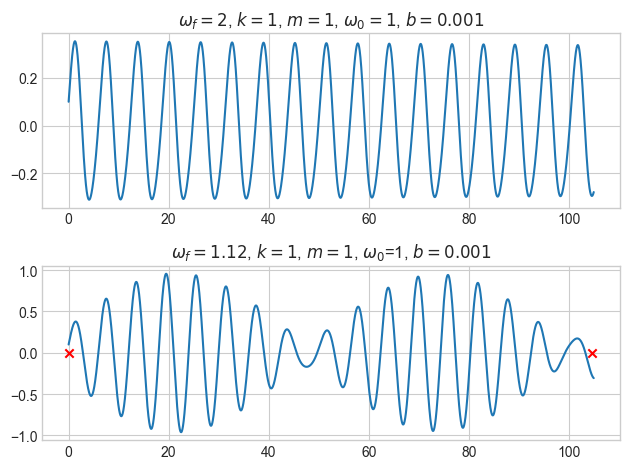

In [3]:
F, m, w0, wf, b = 0.1, 1, 1, 2, 0.001
graph2 = dsbRK4([0.1, 0.3], model, 2, 10500, 1/100)

F, m, w0, wf, b = 0.1, 1, 1, 1.12, 0.001
graph3 = dsbRK4([0.1, 0.3], model, 2, 10500, 1/100)

#Plotting to make sure the period of the beat frequency is the frequency of the difference in intensity
f = (wf-w0)/(4*np.pi)
T = 1/f

print([0, T])

fig34, ax34 = plt.subplots(2, 1)

ax34[0].plot(graph2[1], graph2[0][0])
ax34[0].set_title('$\omega_f=2$, $k=1$, $m=1$, $\omega_0=1$, $b=0.001$')

ax34[1].plot(graph3[1], graph3[0][0])
ax34[1].set_title('$\omega_f=1.12$, $k=1$, $m=1$, $\omega_0$=1, $b=0.001$')
ax34[1].scatter([0, T], [0,0], color = 'r', marker = 'x')

plt.show()

These oscillations don't appear damped because the viscousity coefficient is so small in comparison to the amount of energy that is added back into the system by the driving force.

We can also see that the beat frequency is show to roughly be the frequency of the changing intensity of the oscillation. 

Below we consider how the beat frequency oscillation becomes affected by non-negagible viscousity forces:

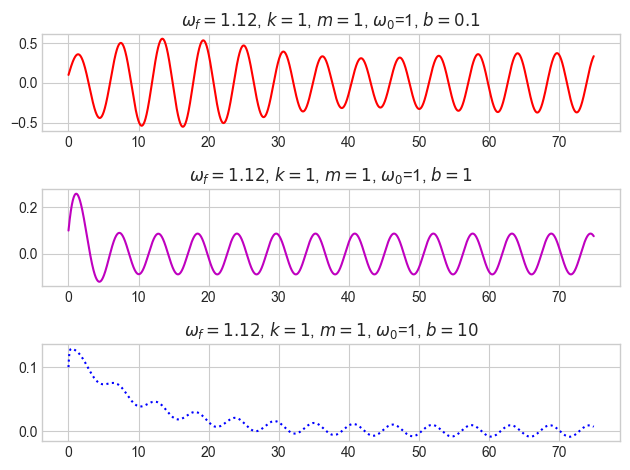

In [4]:
F, m, w0, wf, b = 0.1, 1, 1, 1.12, 0.1
graph4 = dsbRK4([0.1, 0.3], model, 2, 7500, 1/100)

F, m, w0, wf, b = 0.1, 1, 1, 1.12, 1
graph5= dsbRK4([0.1, 0.3], model, 2, 7500, 1/100)

F, m, w0, wf, b = 0.1, 1, 1, 1.12, 10
graph6 = dsbRK4([0.1, 0.3], model, 2, 7500, 1/100)

fric, axFric = plt.subplots(3, 1)

axFric[0].plot(graph4[1], graph4[0][0], 'r-')
axFric[0].set_title('$\omega_f=1.12$, $k=1$, $m=1$, $\omega_0$=1, $b=0.1$')
axFric[1].plot(graph5[1], graph5[0][0], 'm-')
axFric[1].set_title('$\omega_f=1.12$, $k=1$, $m=1$, $\omega_0$=1, $b=1$')
axFric[2].plot(graph6[1], graph6[0][0], 'b:')
axFric[2].set_title('$\omega_f=1.12$, $k=1$, $m=1$, $\omega_0$=1, $b=10$')

plt.show()

Notice the overall underdamped, critically damped, and overdamped behaviors seemed to be exhibited in some ways in the driven oscillation.

Let's go back to considering the scenario with very little viscous friction and attempt to explore the resonance property of driven oscillations


In [5]:
def max_A(driving_freq, mod):
    s = dsbRK4([0.1, 0.3], mod, 2, 100, 1/10)
    return max(s[0][0])

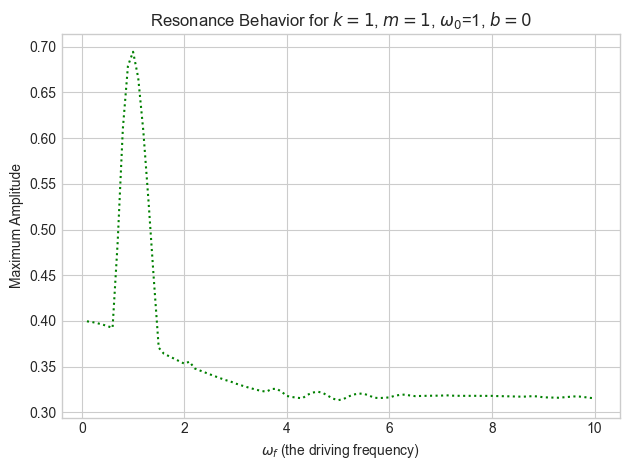

In [6]:
F, m, w0, b = 0.1, 1, 1, 0

j = 100
freqs = np.linspace(1/10, 10, j)
amplitudes = np.empty([j])

for i in range(0, j):
    wf = freqs[i]
    amplitudes[i] = max_A(freqs[i], model)

plt.plot(freqs, amplitudes, 'g:')
plt.title("Resonance Behavior for $k=1$, $m=1$, $\omega_0$=1, $b=0$")
plt.xlabel("$\omega_f$ (the driving frequency)")
plt.ylabel("Maximum Amplitude")
plt.show()

We can see from the response graph that there is a blow up in the possible amplitude of the oscillation around the natural frequency of the oscillation. This is because the driving force is perfectly in phase with the driving frequency and perfectly adds energy into the system without doing any negative work. (<i>Imagine pushing a swing. You only want to push the person on the swing at the exact same frequency of the swing. If you're off by any amount you'll actually slow the swinger down.</i>)

Let's see how the inclusion of the viscous force affects the resonance curve.

In [7]:
F, m, w0, b = 0.1, 1, 1, 0.3

j = 100
amplitudes_fric = np.empty([j])

for i in range(0, j):
    wf = freqs[i]
    amplitudes_fric[i] = max_A(freqs[i])

plt.plot(freqs, amplitudes_fric, 'b:')
plt.title("Resonance Behavior for $k=1$, $m=1$, $\omega_0$=1, $b=0$")
plt.xlabel("$\omega_f$ (the driving frequency)")
plt.ylabel("Maximum Amplitude")
plt.show()

TypeError: max_A() missing 1 required positional argument: 'mod'

We can see that the inclusion of a viscous force broadens the curve and can almost remove the resonance behavior from the oscillation behavior if the oscillation is larger enough.

<b><i>Why does the maxmimum amplitude reached decrease when adding the viscous friction force?</i></b>

To answer this, plotting the driving force and the viscous force can elucidate some understanding

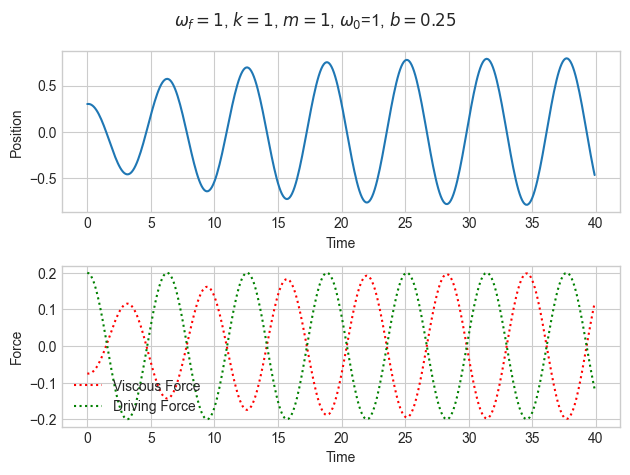

In [ ]:
F, m, w0, wf, b = 0.2, 1, 1, 1, 0.25

graph7 = dsbRK4([0.1, 0.3], model, 2, 400, 1/10)

visc_fric = np.empty(graph7[0][1].size)
driving_force = np.empty(graph7[1].size)

for i in range(0, visc_fric.size):
    visc_fric[i] = -b*graph7[0][1][i]
    driving_force[i] = F*np.cos(wf*graph7[1][i])

fig, ax = plt.subplots(2,1)

ax[0].plot(graph7[1], graph7[0][1])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Position')

ax[1].plot(graph7[1], visc_fric, 'r:', label = 'Viscous Force')
ax[1].plot(graph7[1], driving_force, 'g:', label = 'Driving Force')
ax[1].set_ylabel('Force')
ax[1].set_xlabel('Time')
fig.suptitle('$\omega_f = 1$, $k=1$, $m=1$, $\omega_0$=1, $b=0.25$')
plt.legend(loc = 'lower left')
plt.show()

From the force plot, intially the driving force is strong that the friction force. Since it is completely in phase with the linear oscillation, the block will start to speed up. At a certain point, the block is going fast enough such that the driving force and the viscous force are exactly equal and perfectly out of phase. Therefore, the energy of the system goes back to being constant and oscillating at a new amplitude associated with the new total energy of the system.

We now want to try to explore driving a nonlinear system. We'll add a new model that incorporates the $p$ model used when first investigating types on nonlinear models.

In [10]:
def model2(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = F*np.cos(wf*t)/m - (b*y[1])/m - (w0*w0)*(y[0]**(p-1)) #Added the driving for to the nonlinear equation model

    return v

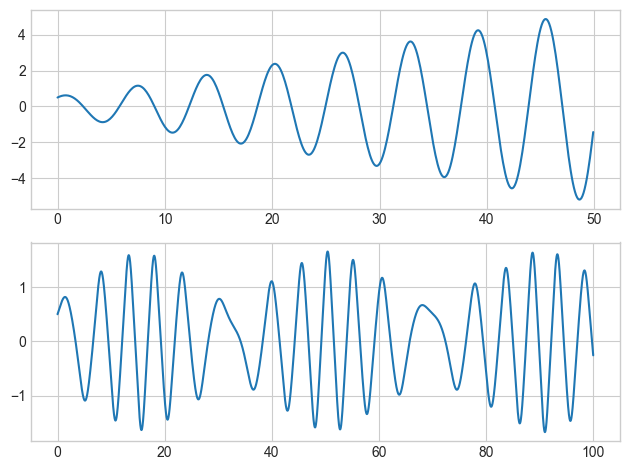

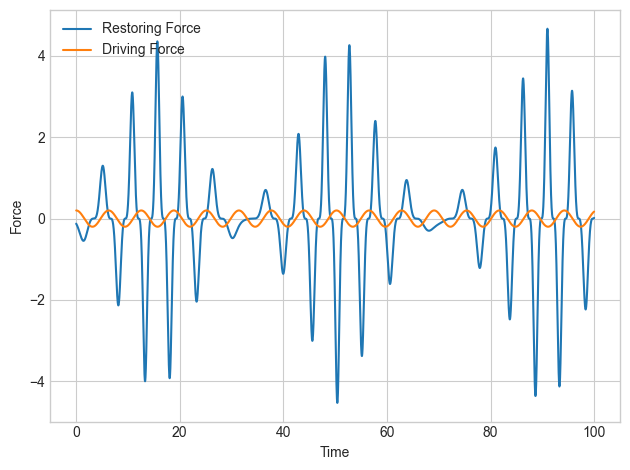

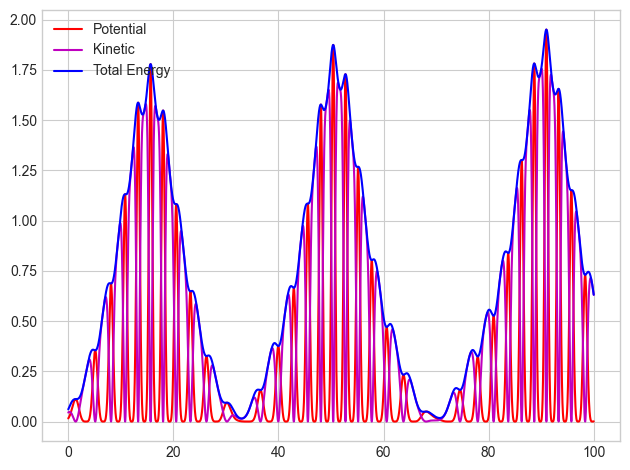

In [14]:
F, m, w0, wf, b = 0.2, 1, 1, 1, 0
p=2
graph8 = dsbRK4([0.5, 0.3], model2, 2, 500, 1/10)

F, k, m, w0, wf, b = 0.2, 1, 1, 1, 1, 0
p=4
graph9 = dsbRK4([0.5, 0.3], model2, 2, 20000, 1/200)

fig, axis = plt.subplots(2,1)

axis[0].plot(graph8[1], graph8[0][0])
axis[1].plot(graph9[1], graph9[0][0])

plt.show()

driving_force = np.empty(graph9[1].size)
restore_force = np.empty(graph9[0][0].size)
PE = np.empty(graph9[0][0].size)
KE = np.empty(graph9[0][1].size)
E = np.empty(graph9[0][1].size)

for i in range(0, driving_force.size):

    #Finding the restoring force and the driving force
    restore_force[i] = -k*(graph9[0][0][i]**(p-1))
    driving_force[i] = F*np.cos(wf*graph9[1][i])

    #Finding the values for energy
    PE[i] = (1/p)*k*(graph9[0][0][i]**(p))
    KE[i] = 0.5*m*(graph9[0][1][i]**2)
    E[i] = KE[i]+PE[i]

#
plt.plot(graph9[1], restore_force, label = 'Restoring Force')
plt.plot(graph9[1], driving_force, label = 'Driving Force')
plt.ylabel('Force')
plt.xlabel('Time')
plt.legend(loc = 'best')
plt.show()

#Energy Graph
plt.plot(graph9[1], PE, 'r', label = 'Potential')
plt.plot(graph9[1], KE, 'm', label = 'Kinetic')
plt.plot(graph9[1], E, 'b', label='Total Energy')
plt.legend(loc = 'best')
plt.show()

After graphing everything I could think of to help with the problem, <b>I'm still unsure as to the origin of the beating of the nonlinear oscillator</b>.